# Mean Shift

## Reading dataset

In [29]:
from clustering.mnist import read_MNIST_small

data = read_MNIST_small().reduce_to_percentage(percentage=.02)
data

Reading small MNIST
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\pixels_s.csv
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\labels_s.csv


[Length: 210; Features: 784]

In [30]:
X, y = data

## Construct iteration

In [32]:
from clustering.model.clustering import MeanShiftEvaluation

mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[1, 2, 3, 5, 10, 20, 30, 50, 100, 120, 150, 170, 200],
    hyperparameter=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.],
    log_=True
)

mean_shift_evaluation

MeanShiftEvaluation [n_components: [1, 2, 3, 5, 10, 20, 30, 50, 100, 120, 150, 170, 200], kernel-size: [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0], not evaluated]

In [33]:
%%time
mean_shift_evaluation.evaluate()

Processing kernel-size: 0.01
  > Processed number of component: 1 [0.32910 s] 
  > Processed number of component: 2 [0.20864 s] 
  > Processed number of component: 3 [0.20410 s] 
  > Processed number of component: 5 [0.21549 s] 
  > Processed number of component: 10 [0.20476 s] 
  > Processed number of component: 20 [0.14983 s] 
  > Processed number of component: 30 [0.15708 s] 
  > Processed number of component: 50 [0.22308 s] 
  > Processed number of component: 100 [0.22790 s] 
  > Processed number of component: 120 [0.23933 s] 
  > Processed number of component: 150 [0.21686 s] 
  > Processed number of component: 170 [0.23273 s] 
  > Processed number of component: 200 [0.23105 s] 
Processing kernel-size: 0.05
  > Processed number of component: 1 [0.51914 s] 
  > Processed number of component: 2 [0.25646 s] 
  > Processed number of component: 3 [0.19110 s] 
  > Processed number of component: 5 [0.20687 s] 
  > Processed number of component: 10 [0.15347 s] 
  > Processed number of com

In [34]:
mean_shift_evaluation.best_model

MeanShift[N-rows: 210; N-components: 10;  Score: 0.9034404192298929, N-clusters: 151] [KernelSize: 0.3] 

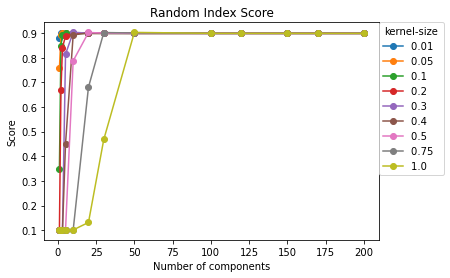

In [35]:
mean_shift_evaluation.plot_score(save=True, file_name="meanshift_score")

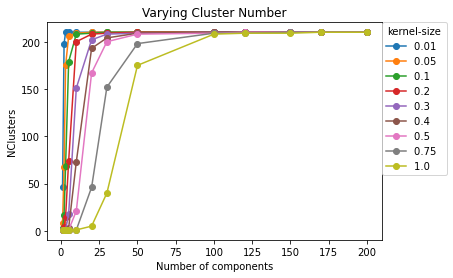

In [36]:
mean_shift_evaluation.plot_n_clusters(save=True, file_name="meanshift_clusters")

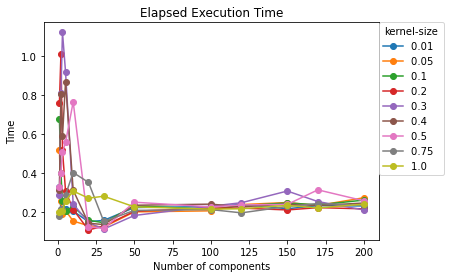

In [37]:
mean_shift_evaluation.plot_time(save=True, file_name="meanshift_exec_time")

## Best model

In [38]:
from clustering.model.model import DataClusterSplit

In [39]:
best = mean_shift_evaluation.best_model

In [40]:
best

MeanShift[N-rows: 210; N-components: 10;  Score: 0.9034404192298929, N-clusters: 151] [KernelSize: 0.3] 

In [41]:
clusters = DataClusterSplit(data=data, index=best.out)

In [42]:
clusters

ClusterDataSplit [Data: 210, Clusters: 151, Mean-per-Cluster: 1.391, Score: 0.903] 

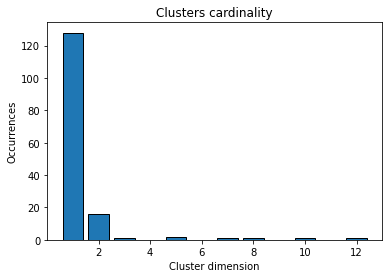

In [43]:
clusters.plot_frequencies_histo()

In [52]:
clusters_best = clusters.get_sub_clusters(a=2)

In [53]:
clusters_best

ClusterDataSplit [Data: 82, Clusters: 23, Mean-per-Cluster: 3.565, Score: 0.917] 

In [54]:
clusters_best.rand_index_score

0.916892502258356

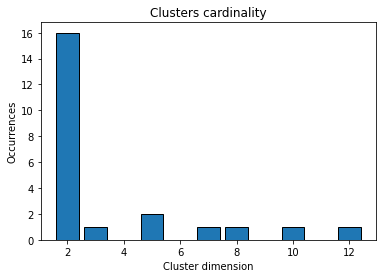

In [55]:
clusters_best.plot_frequencies_histo()

[Mode 1: {1: 9, 8: 2, 3: 1}] 


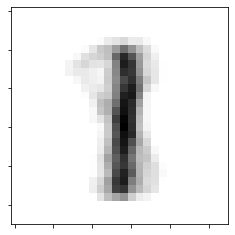

[Mode 6: {6: 10}] 


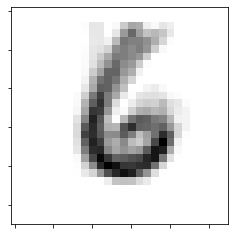

[Mode 9: {9: 4, 4: 2, 7: 2}] 


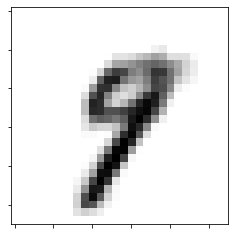

[Mode 3: {3: 5}] 


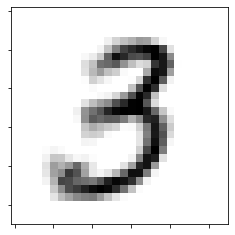

[Mode 8: {8: 7}] 


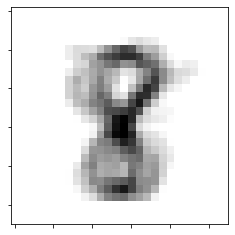

[Mode 1: {1: 5}] 


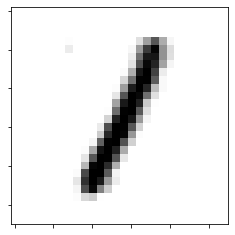

[Mode 7: {7: 3}] 


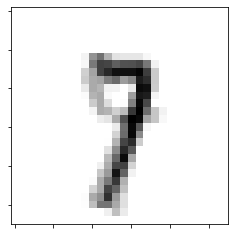

[Mode 0: {0: 2}] 


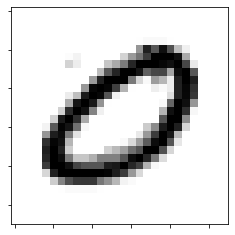

[Mode 2: {2: 2}] 


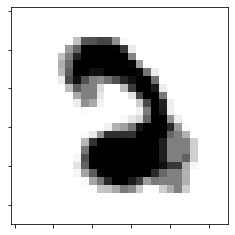

[Mode 5: {5: 2}] 


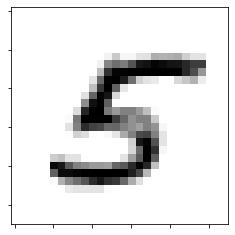

[Mode 2: {2: 2}] 


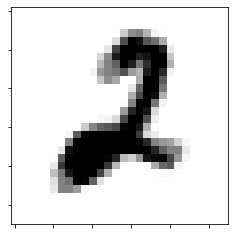

[Mode 3: {3: 2}] 


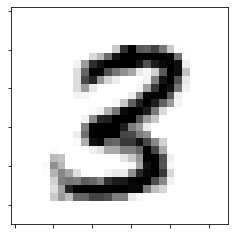

[Mode 7: {7: 2}] 


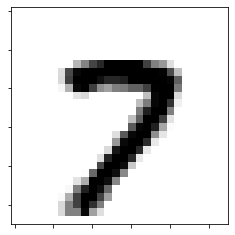

[Mode 7: {7: 2}] 


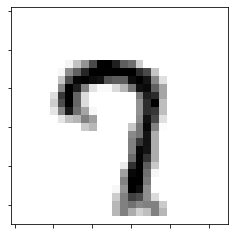

[Mode 7: {7: 2}] 


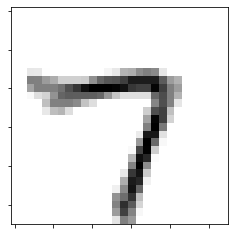

[Mode 3: {3: 2}] 


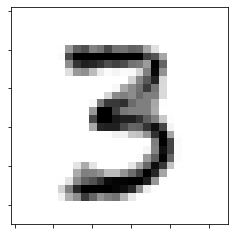

[Mode 9: {9: 1, 4: 1}] 


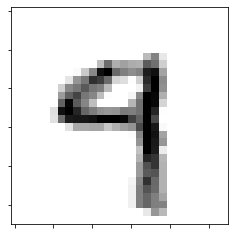

[Mode 5: {5: 2}] 


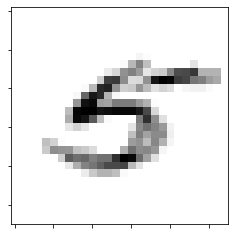

[Mode 3: {3: 2}] 


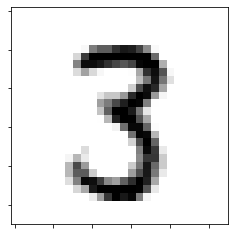

[Mode 9: {9: 2}] 


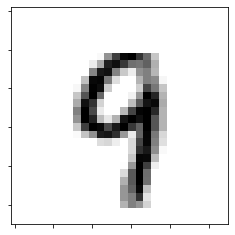

[Mode 9: {9: 2}] 


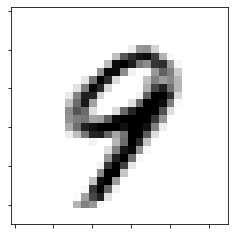

[Mode 7: {7: 2}] 


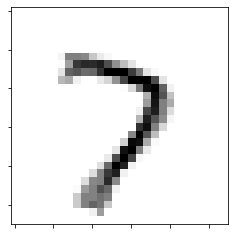

[Mode 4: {4: 2}] 


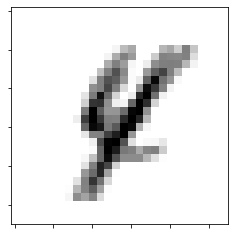

In [56]:
clusters_best.plot_mean_digit()

In [49]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [57]:
clusters_bad

ClusterDataSplit [Data: 128, Clusters: 128, Mean-per-Cluster: 1.000, Score: 0.876] 

[Mode 0: {0: 1}] 


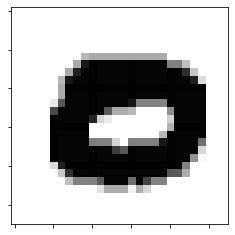

[Mode 0: {0: 1}] 


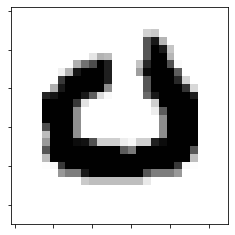

[Mode 0: {0: 1}] 


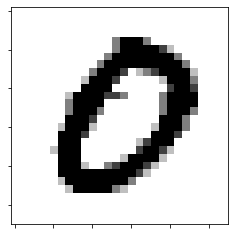

[Mode 0: {0: 1}] 


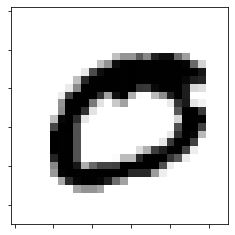

[Mode 0: {0: 1}] 


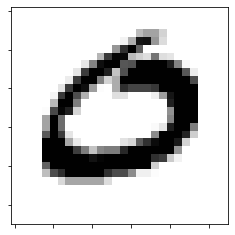

[Mode 0: {0: 1}] 


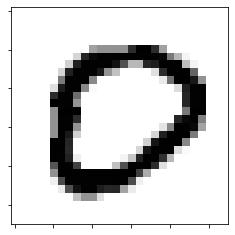

[Mode 0: {0: 1}] 


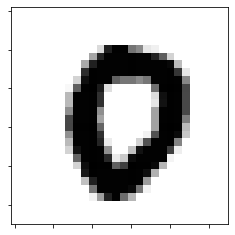

[Mode 0: {0: 1}] 


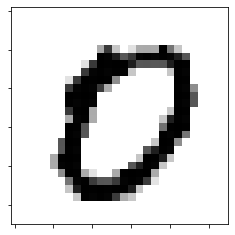

[Mode 0: {0: 1}] 


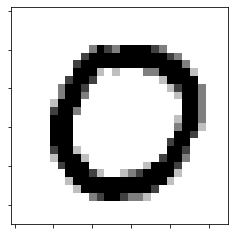

[Mode 0: {0: 1}] 


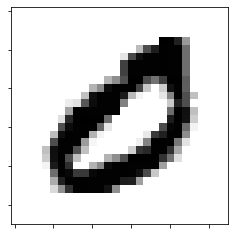

[Mode 0: {0: 1}] 


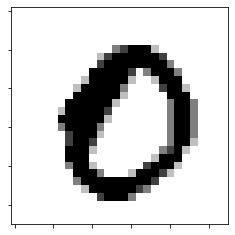

[Mode 2: {2: 1}] 


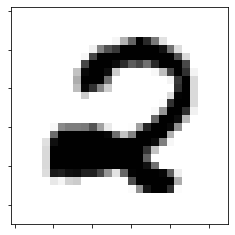

[Mode 0: {0: 1}] 


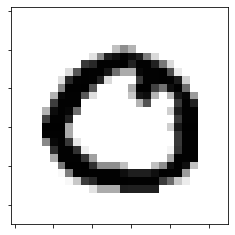

[Mode 0: {0: 1}] 


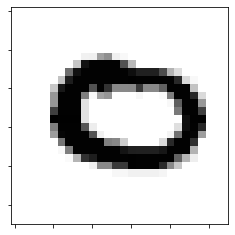

[Mode 6: {6: 1}] 


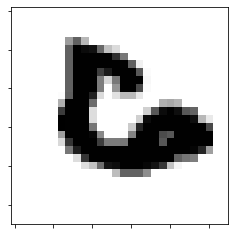

[Mode 2: {2: 1}] 


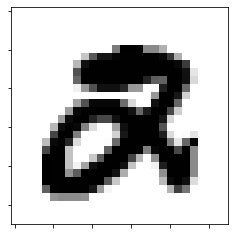

[Mode 0: {0: 1}] 


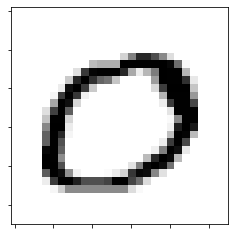

[Mode 0: {0: 1}] 


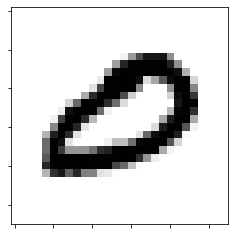

[Mode 2: {2: 1}] 


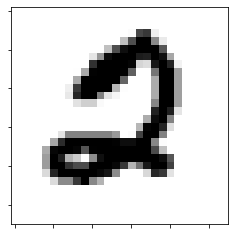

[Mode 6: {6: 1}] 


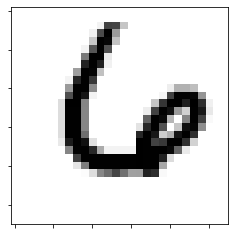

[Mode 2: {2: 1}] 


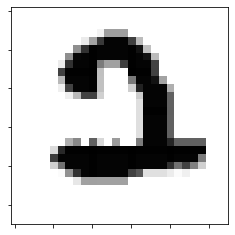

[Mode 0: {0: 1}] 


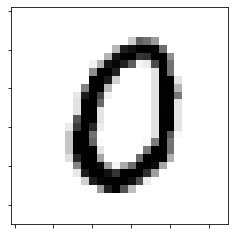

[Mode 0: {0: 1}] 


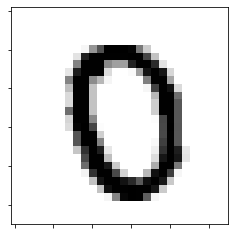

[Mode 0: {0: 1}] 


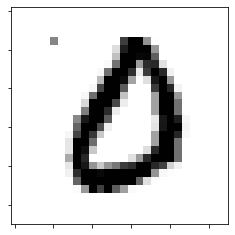

[Mode 0: {0: 1}] 


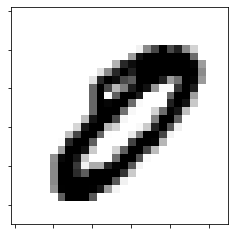

[Mode 5: {5: 1}] 


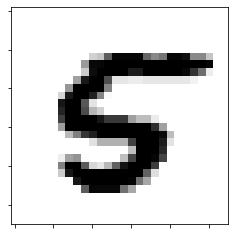

[Mode 2: {2: 1}] 


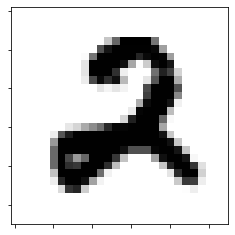

[Mode 8: {8: 1}] 


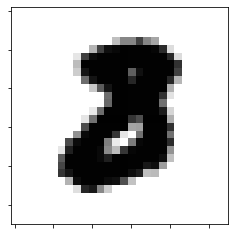

[Mode 2: {2: 1}] 


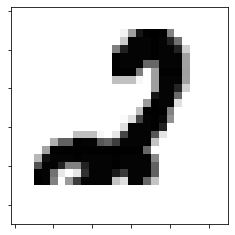

[Mode 3: {3: 1}] 


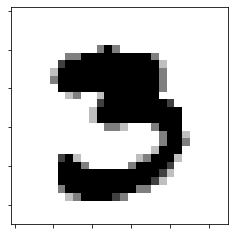

[Mode 0: {0: 1}] 


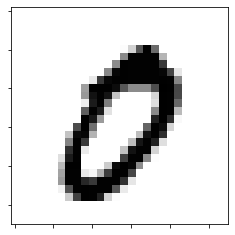

[Mode 9: {9: 1}] 


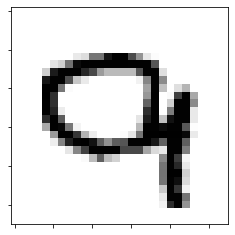

[Mode 0: {0: 1}] 


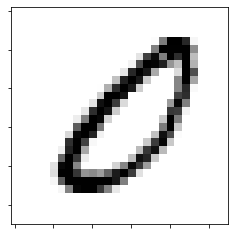

[Mode 5: {5: 1}] 


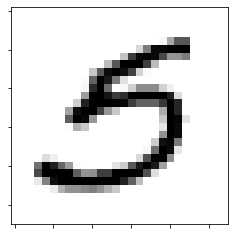

[Mode 2: {2: 1}] 


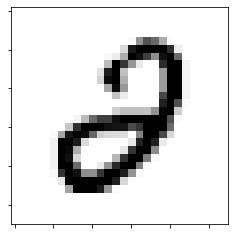

[Mode 0: {0: 1}] 


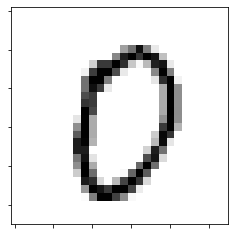

[Mode 2: {2: 1}] 


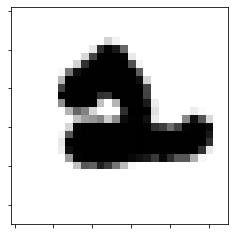

[Mode 7: {7: 1}] 


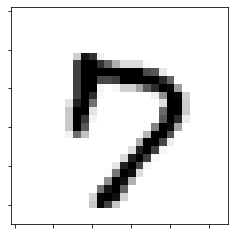

[Mode 2: {2: 1}] 


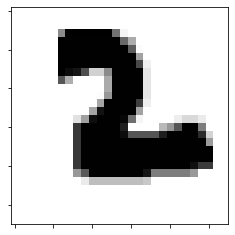

[Mode 3: {3: 1}] 


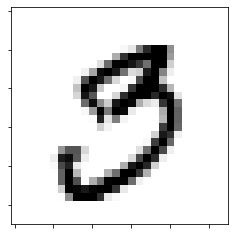

[Mode 0: {0: 1}] 


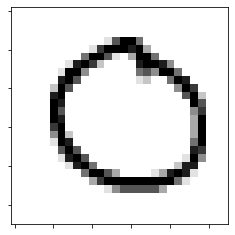

[Mode 0: {0: 1}] 


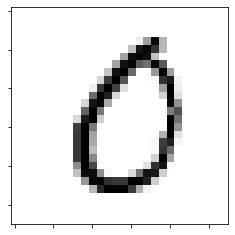

[Mode 2: {2: 1}] 


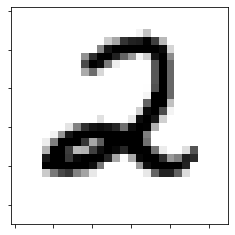

[Mode 2: {2: 1}] 


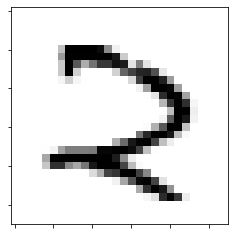

[Mode 5: {5: 1}] 


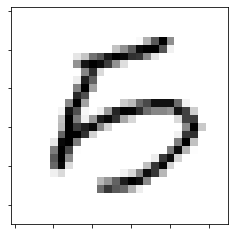

[Mode 2: {2: 1}] 


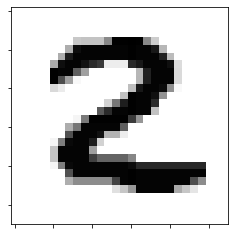

[Mode 9: {9: 1}] 


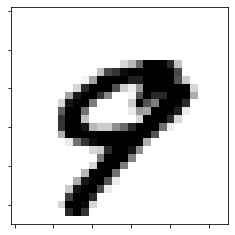

[Mode 8: {8: 1}] 


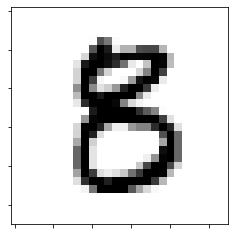

[Mode 4: {4: 1}] 


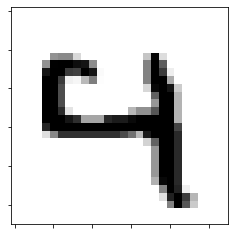

[Mode 5: {5: 1}] 


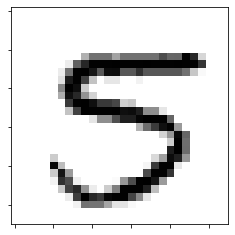

[Mode 8: {8: 1}] 


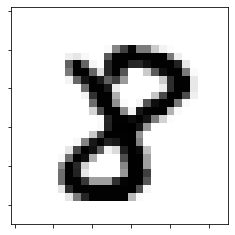

[Mode 3: {3: 1}] 


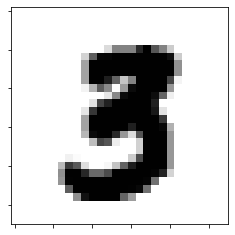

[Mode 8: {8: 1}] 


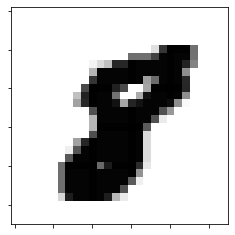

[Mode 6: {6: 1}] 


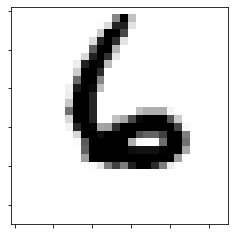

[Mode 4: {4: 1}] 


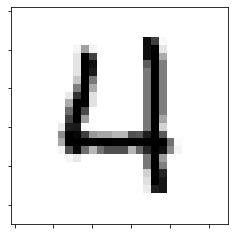

[Mode 4: {4: 1}] 


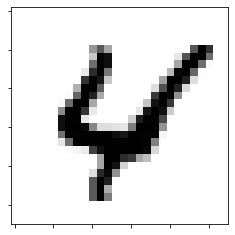

[Mode 3: {3: 1}] 


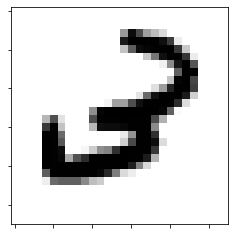

[Mode 2: {2: 1}] 


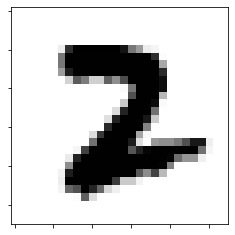

[Mode 5: {5: 1}] 


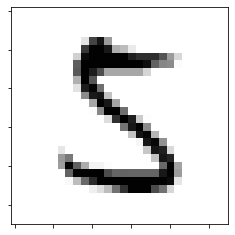

[Mode 2: {2: 1}] 


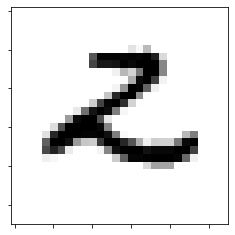

[Mode 8: {8: 1}] 


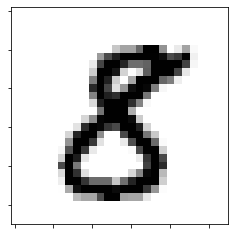

[Mode 3: {3: 1}] 


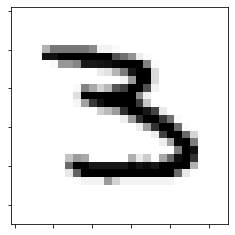

[Mode 7: {7: 1}] 


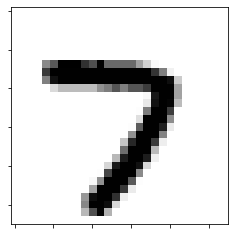

[Mode 9: {9: 1}] 


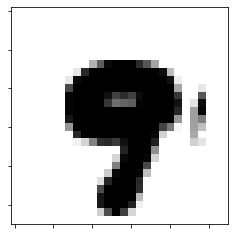

[Mode 8: {8: 1}] 


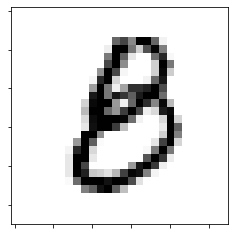

[Mode 5: {5: 1}] 


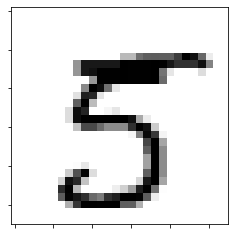

[Mode 3: {3: 1}] 


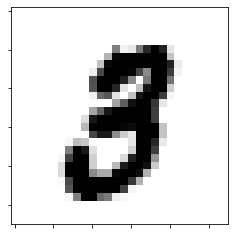

[Mode 4: {4: 1}] 


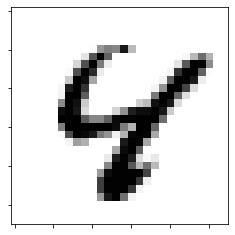

[Mode 0: {0: 1}] 


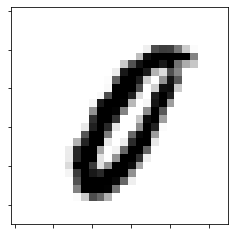

[Mode 7: {7: 1}] 


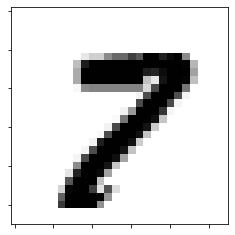

[Mode 6: {6: 1}] 


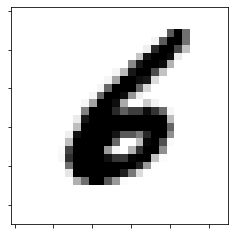

[Mode 8: {8: 1}] 


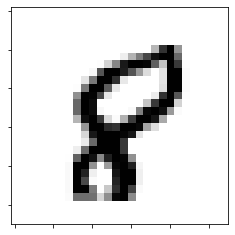

[Mode 4: {4: 1}] 


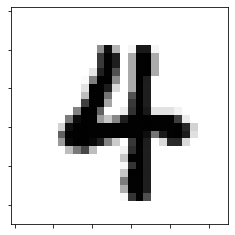

[Mode 9: {9: 1}] 


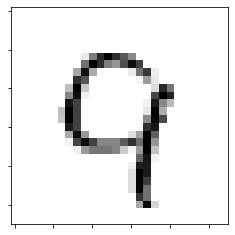

[Mode 5: {5: 1}] 


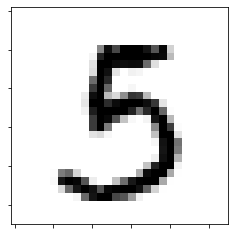

[Mode 7: {7: 1}] 


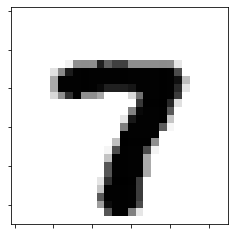

[Mode 3: {3: 1}] 


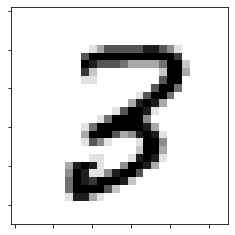

[Mode 5: {5: 1}] 


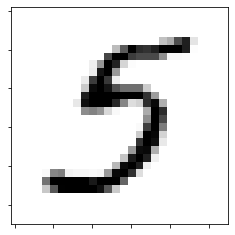

[Mode 8: {8: 1}] 


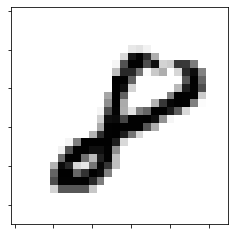

[Mode 5: {5: 1}] 


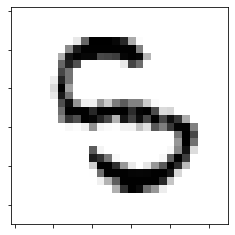

[Mode 8: {8: 1}] 


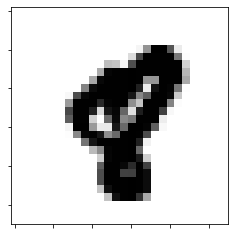

[Mode 4: {4: 1}] 


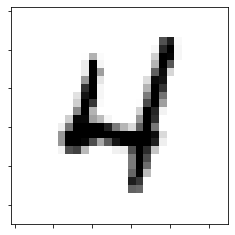

[Mode 8: {8: 1}] 


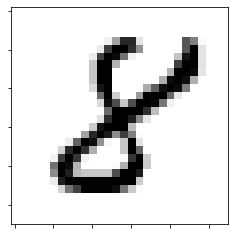

[Mode 3: {3: 1}] 


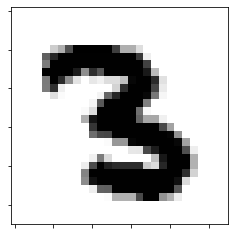

[Mode 8: {8: 1}] 


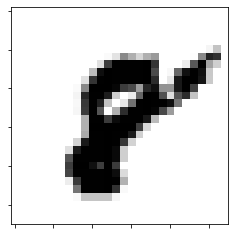

[Mode 5: {5: 1}] 


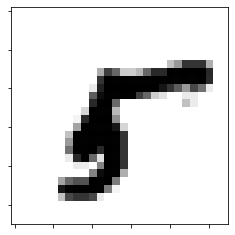

[Mode 2: {2: 1}] 


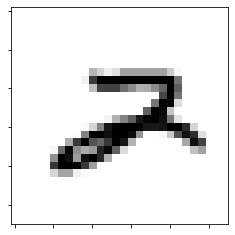

[Mode 3: {3: 1}] 


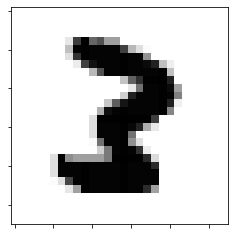

[Mode 3: {3: 1}] 


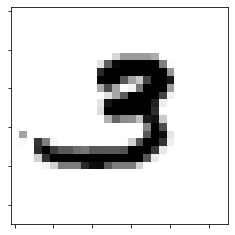

[Mode 7: {7: 1}] 


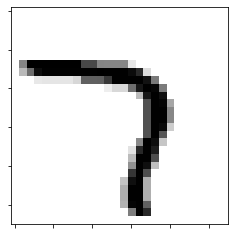

[Mode 4: {4: 1}] 


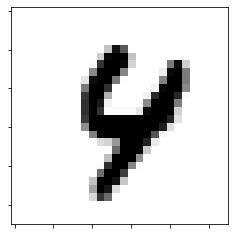

[Mode 8: {8: 1}] 


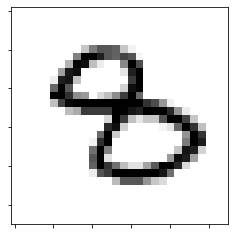

[Mode 5: {5: 1}] 


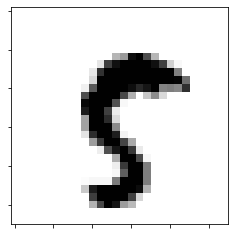

[Mode 2: {2: 1}] 


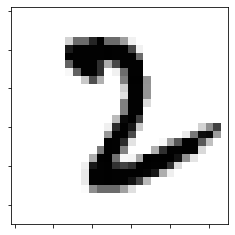

[Mode 3: {3: 1}] 


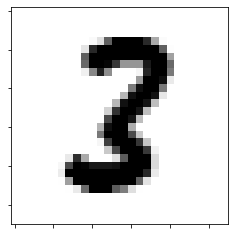

[Mode 4: {4: 1}] 


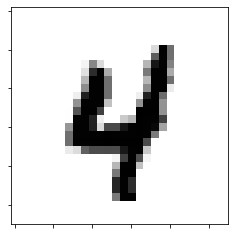

[Mode 2: {2: 1}] 


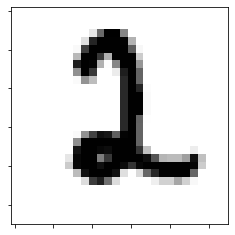

[Mode 9: {9: 1}] 


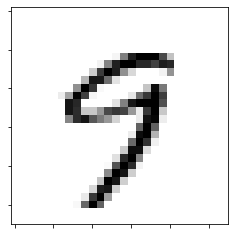

[Mode 2: {2: 1}] 


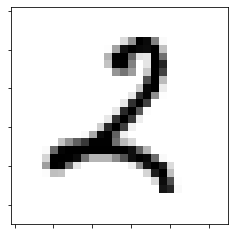

[Mode 4: {4: 1}] 


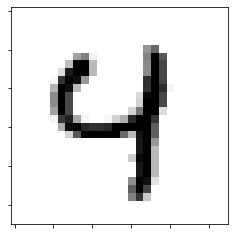

[Mode 2: {2: 1}] 


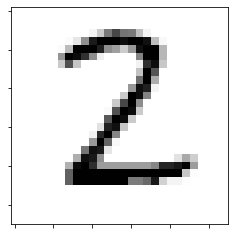

[Mode 9: {9: 1}] 


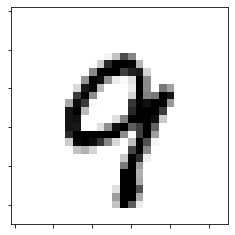

[Mode 5: {5: 1}] 


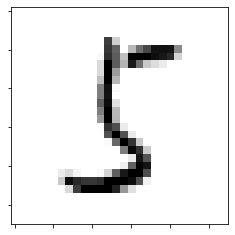

[Mode 2: {2: 1}] 


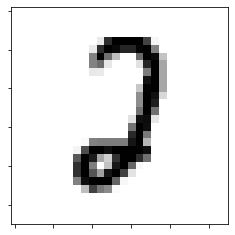

[Mode 7: {7: 1}] 


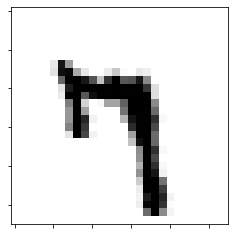

[Mode 5: {5: 1}] 


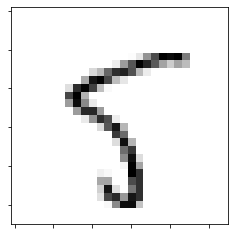

[Mode 3: {3: 1}] 


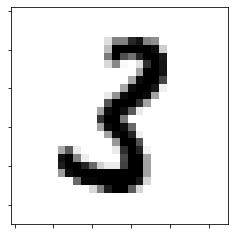

[Mode 8: {8: 1}] 


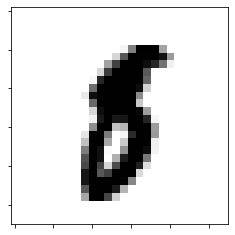

[Mode 2: {2: 1}] 


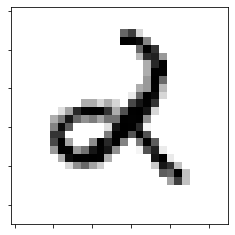

[Mode 8: {8: 1}] 


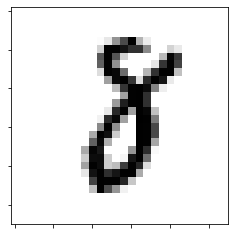

[Mode 8: {8: 1}] 


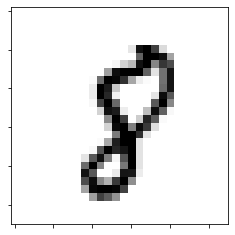

[Mode 4: {4: 1}] 


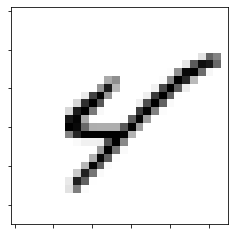

[Mode 9: {9: 1}] 


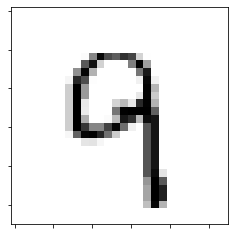

[Mode 7: {7: 1}] 


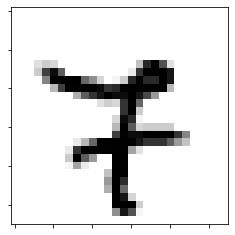

[Mode 8: {8: 1}] 


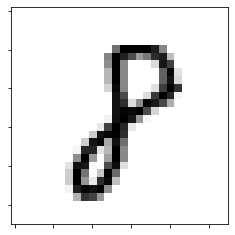

[Mode 7: {7: 1}] 


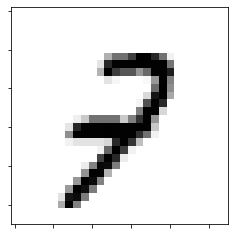

[Mode 7: {7: 1}] 


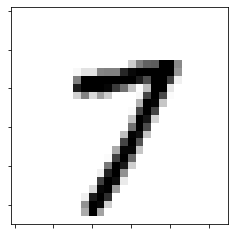

[Mode 3: {3: 1}] 


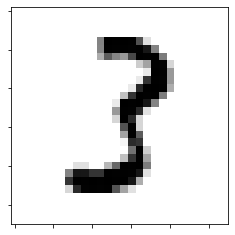

[Mode 4: {4: 1}] 


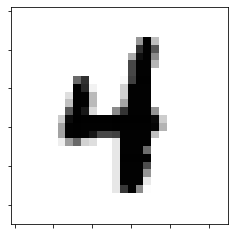

[Mode 8: {8: 1}] 


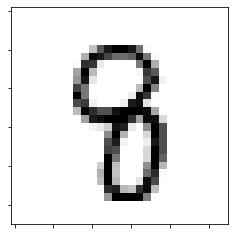

[Mode 9: {9: 1}] 


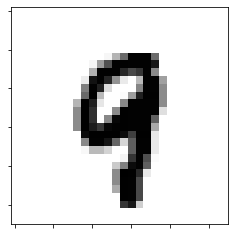

[Mode 2: {2: 1}] 


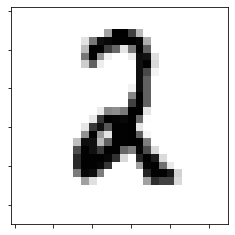

[Mode 5: {5: 1}] 


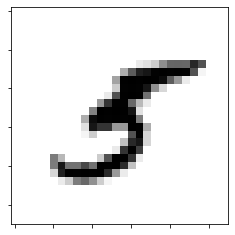

[Mode 9: {9: 1}] 


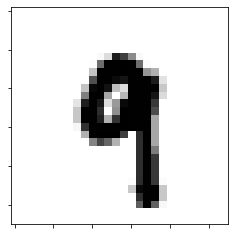

[Mode 2: {2: 1}] 


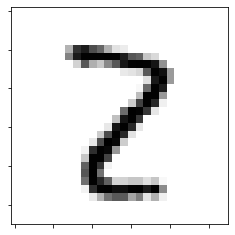

[Mode 7: {7: 1}] 


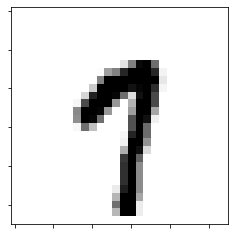

[Mode 4: {4: 1}] 


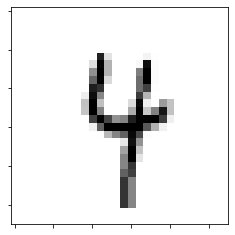

[Mode 1: {1: 1}] 


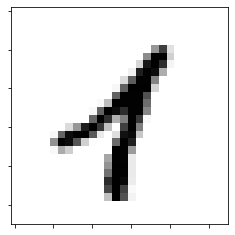

In [58]:
clusters_bad.plot_mean_digit()